In [ ]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_feature):
        super().__init__()
        self.linear = nn.Linear(num_feature, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, features):
        out = self.linear(features)
        out = self.sigmoid(out)

        return out




In [ ]:
features  = torch.rand(10, 5)
print(features)

model = Model(features.shape[1])
model(features)

tensor([[0.5329, 0.6364, 0.0911, 0.9995, 0.8004],
        [0.2856, 0.0330, 0.2220, 0.8473, 0.0894],
        [0.9521, 0.8067, 0.7622, 0.3677, 0.8898],
        [0.5973, 0.5722, 0.4136, 0.2201, 0.7111],
        [0.7334, 0.8661, 0.8251, 0.4540, 0.9922],
        [0.8996, 0.2490, 0.7804, 0.1432, 0.0446],
        [0.2453, 0.1604, 0.6509, 0.7470, 0.7496],
        [0.6593, 0.0364, 0.2013, 0.8570, 0.1357],
        [0.4339, 0.9240, 0.5933, 0.0971, 0.6397],
        [0.8157, 0.8255, 0.3399, 0.5645, 0.6367]])


tensor([[0.6176],
        [0.6019],
        [0.5105],
        [0.5177],
        [0.5031],
        [0.4976],
        [0.5661],
        [0.6219],
        [0.4569],
        [0.5500]], grad_fn=<SigmoidBackward0>)

In [ ]:
model.linear.weight

Parameter containing:
tensor([[ 0.1854, -0.2743, -0.3214,  0.4161,  0.1132]], requires_grad=True)

In [ ]:
model.linear.bias

Parameter containing:
tensor([0.0780], requires_grad=True)

In [ ]:
%pip install torchinfo

In [ ]:
from torchinfo import summary

summary(model,input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 1]                   6
├─Sigmoid: 1-2                           [10, 1]                   --
Total params: 6
Trainable params: 6
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
class Model_NN_Seq(nn.Module):
    def __init__(self, num_feature):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(num_feature, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

    def forward(self, features):
        out = self.network(features)

        return out

In [ ]:
features  = torch.rand(10, 5)

model_ = Model_NN_Seq(features.shape[1])
model(features)

tensor([[0.4900],
        [0.5581],
        [0.5571],
        [0.4885],
        [0.5084],
        [0.4187],
        [0.4885],
        [0.4903],
        [0.5328],
        [0.4914]], grad_fn=<SigmoidBackward0>)

In [ ]:
model_.network[0].weight

Parameter containing:
tensor([[-0.2708, -0.2164,  0.3937, -0.0305,  0.4125],
        [ 0.2877,  0.0335, -0.0099,  0.2542,  0.3844],
        [ 0.3552,  0.0570, -0.3843,  0.0106, -0.0937]], requires_grad=True)

In [ ]:
model_.network[2].weight

Parameter containing:
tensor([[-0.2022, -0.5658,  0.4214]], requires_grad=True)

In [ ]:
model_.network[0].bias

Parameter containing:
tensor([-0.0057,  0.0636, -0.4407], requires_grad=True)

In [ ]:
model_.network[2].bias

Parameter containing:
tensor([0.1557], requires_grad=True)

In [ ]:
model_.network[0]

Linear(in_features=5, out_features=3, bias=True)

In [ ]:
summary(model_, input_size=(10, 5))

Layer (type:depth-idx)                   Output Shape              Param #
Model_NN_Seq                             [10, 1]                   --
├─Sequential: 1-1                        [10, 1]                   --
│    └─Linear: 2-1                       [10, 3]                   18
│    └─ReLU: 2-2                         [10, 3]                   --
│    └─Linear: 2-3                       [10, 1]                   4
│    └─Sigmoid: 2-4                      [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [ ]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)
X_train_tensor.shape
y_train_tensor.shape
X_test_tensor.shape
y_test_tensor.shape

torch.Size([114])

In [ ]:
class MySimpleNN():

  def __init__(self, X):

    self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    # Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss


In [ ]:
learning_rate = 0.1
epochs = 25


In [ ]:

learning_rate = 0.1
epochs = 25
model = MySimpleNN(X_train_tensor)

# define loop
for epoch in range(epochs):

  # forward pass
  y_pred = model.forward(X_train_tensor)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)

  # backward pass
  loss.backward()

  # parameters update
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 3.8196725498677706
Epoch: 2, Loss: 3.7115270114586907
Epoch: 3, Loss: 3.6006945772697945
Epoch: 4, Loss: 3.483204756477579
Epoch: 5, Loss: 3.3602754501078214
Epoch: 6, Loss: 3.233947861133565
Epoch: 7, Loss: 3.101647573065562
Epoch: 8, Loss: 2.967524456559197
Epoch: 9, Loss: 2.829332377625449
Epoch: 10, Loss: 2.6862701053753795
Epoch: 11, Loss: 2.530622362079027
Epoch: 12, Loss: 2.3660420666923225
Epoch: 13, Loss: 2.1989245713654326
Epoch: 14, Loss: 2.0337183361684725
Epoch: 15, Loss: 1.8737342651571194
Epoch: 16, Loss: 1.7201639461984555
Epoch: 17, Loss: 1.5691823270061807
Epoch: 18, Loss: 1.4237864096565003
Epoch: 19, Loss: 1.2836482563185285
Epoch: 20, Loss: 1.1589089832348456
Epoch: 21, Loss: 1.0517141006799424
Epoch: 22, Loss: 0.9635150038726489
Epoch: 23, Loss: 0.8945594966607057
Epoch: 24, Loss: 0.8435336163493597
Epoch: 25, Loss: 0.807645797849593


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils
import torchinfo as torchinfo
from torchinfo import summary
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from matplotlib import pyplot as plt



In [ ]:
torch.manual_seed(42)

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'}'}

In [ ]:
pwd

'/content'

In [ ]:
df = pd.read_csv('./fmnist_small.csv')

In [ ]:

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [ ]:
df.shape

(6000, 785)

0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0 125  72   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0 120 108   0   0
    4   6  11  17  80  24 224  30   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 208 230 187 226
  236 242 213 221 239 247 137   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   5   0   0 199 210 206 200
  205 208 208 216 213 244  88   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   6 213 218 201 197
  207 212 209 219 220 240  77   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0   7   0  21 222 216 197 202
  210 213 214 221 220 235  65   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0   6   0  45 225 212 194 206
  208 209 212 217 220 230  57   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   6   0  95 229 213 198 205
  207 207 210 215 219 228  46   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 145 227 

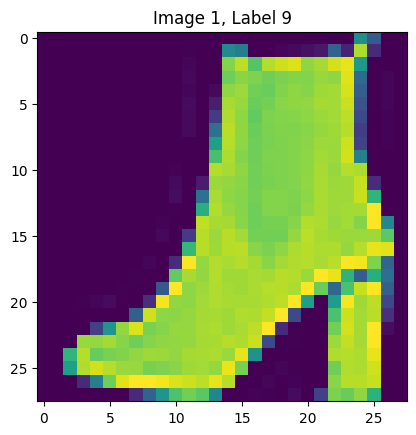

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  32  49
    6   0   0   1   1   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0  24  70 

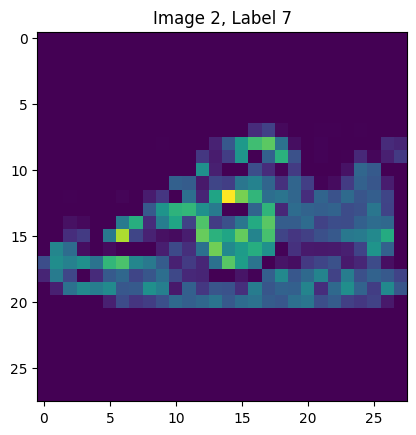

2
[[  0   0   0   0   0   1   0   0   0   0  43 117  34  15  24  33 117  80
    0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   1   0   0   0  51 144 152 202 213 210 205 204 221 157
  172 131  55   0   0   0   1   0   0   0]
 [  0   0   0   1   0   1  96 156 156 152 140 152 176  74  62 159 168 138
  150 157 161 144  96   0   0   1   0   0]
 [  0   0   0   0   0 124 156 143 137 136 142 140 139 159 161 149 140 148
  148 142 144 151 157 108   0   0   0   0]
 [  0   0   0   0  44 143 131 139 136 138 136 137 149 139 135 144 147 143
  143 145 145 144 143 144  24   0   0   0]
 [  0   0   0   0  87 150 138 134 136 135 136 131 110 127 150 130 142 140
  143 140 144 142 142 152  76   0   0   0]
 [  0   0   0   0 124 153 144 134 140 129 148 184 205 209 194 174 120 145
  140 139 143 144 147 154 102   0   0   0]
 [  0   0   0   0 154 147 160 134 139 116 223 214 208 204 186 249 154 127
  144 143 146 148 157 149 146   0   0   0]
 [  0   0   0  13 164 146 166 148 133 136 211 151 128 132 136 

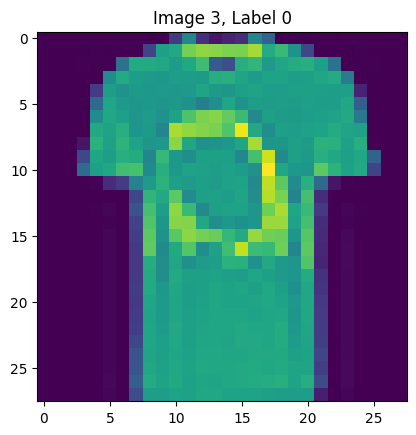

3
[[  0   0   0   0   0   0   0   0   0   0   0   0   2   0  33 114  37   0
    1   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0  47 136  31 136  42
    0   3   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   6   0 139   9   0   1 108
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0  38 104   0  11   0  81
   39   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5   0  90  50   0   7   0  18
   90   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0 122   5   0   2   2   0
  116  14   0   1   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   1   0   1   0  14 100   0   2   0   3   0
   78  47   0   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   2   3   6   0  65 102   0   5   0   3   0
   38  88   0   2   0   0   1   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0  83  73   0   0 

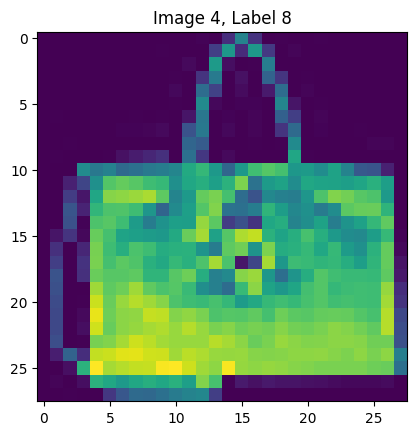

4
[[  0   0   0   0   0   0   0   0   0   0   2   0  58 145 114  10   0   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0  29 132   0   0 101  10   0
    2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0 153   8   0   0  20 126   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   4   0  45 122   0   6   2   0 124  51
    0   4   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   6   0 149  95   0   6   4   0  99 136
    0   6   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0 207  55   0   4   4   0  70 134
    0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   8   0  51 180   0   0   4   2   0  14 118
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   6   6   8  10   6   0 101 130   0   4   0   2   0   6 167
    0   0   4   6   6   4   2   0   0   0]
 [  0   0   0   0   0   0   0   0   0 114 120   0   2   4   2 

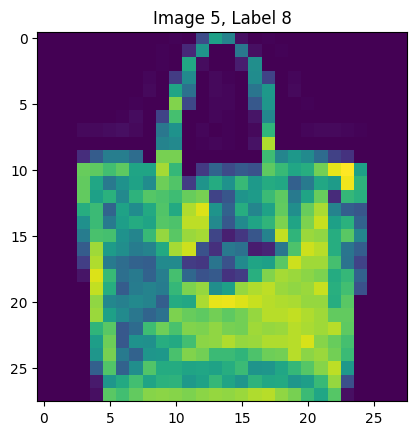

In [ ]:
# prompt: plot the some image from dataset

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a column named 'image'
# representing the image data in a format that can be visualized.
# If the image data is stored as a string, you might need to convert it to a NumPy array

# Example assuming 'image' is already in a suitable format (e.g., a list of pixels):
for i in range(5):
  print(i)
  image_data = np.array(df.iloc[i, 1:]).reshape(28,28)
  print(image_data)
  plt.imshow(image_data)
  plt.title(f'Image {i+1}, Label {df.iloc[i, 0]}')
  plt.show()

In [ ]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
class customDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x.values, dtype=torch.float32)
    self.y = torch.tensor(y.values, dtype=torch.long)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [ ]:
train_dataset = customDataset(X_train, y_train)
test_dataset = customDataset(X_test, y_test)

In [ ]:
len(train_dataset)

4800

In [ ]:

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class NeuralNetwork(nn.Module):
      def __init__(self, num_feature):
          super().__init__()
          self.model = nn.Sequential(
              nn.Linear(num_feature, 128),
              nn.ReLU(),
              nn.Linear(128, 64),
              nn.ReLU(),
              nn.Linear(64, 10)
          )

      def forward(self, x):
          return self.model(x)

In [ ]:
epochs = 100
learning_rate = 0.1


# object instantiation
model = NeuralNetwork(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)



In [ ]:
for epoch in range(epochs):

    total_loss = 0.0
    for batch_features, batch_labels in train_loader:

        # forward pass
        outputs = model(batch_features)
        # loss calculation
        loss = criterion(outputs, batch_labels)

        optimizer.zero_grad()
        # backward pass
        loss.backward()
        # weight update
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch: {epoch+1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 1.3216
Epoch: 2, Loss: 0.7793
Epoch: 3, Loss: 0.6428
Epoch: 4, Loss: 0.5752
Epoch: 5, Loss: 0.5282
Epoch: 6, Loss: 0.4953
Epoch: 7, Loss: 0.4602
Epoch: 8, Loss: 0.4359
Epoch: 9, Loss: 0.4183
Epoch: 10, Loss: 0.3984
Epoch: 11, Loss: 0.3850
Epoch: 12, Loss: 0.3723
Epoch: 13, Loss: 0.3477
Epoch: 14, Loss: 0.3467
Epoch: 15, Loss: 0.3139
Epoch: 16, Loss: 0.3126
Epoch: 17, Loss: 0.2955
Epoch: 18, Loss: 0.2857
Epoch: 19, Loss: 0.2708
Epoch: 20, Loss: 0.2624
Epoch: 21, Loss: 0.2576
Epoch: 22, Loss: 0.2423
Epoch: 23, Loss: 0.2396
Epoch: 24, Loss: 0.2261
Epoch: 25, Loss: 0.2234
Epoch: 26, Loss: 0.2117
Epoch: 27, Loss: 0.2191
Epoch: 28, Loss: 0.2110
Epoch: 29, Loss: 0.1816
Epoch: 30, Loss: 0.1889
Epoch: 31, Loss: 0.1912
Epoch: 32, Loss: 0.1915
Epoch: 33, Loss: 0.1759
Epoch: 34, Loss: 0.1779
Epoch: 35, Loss: 0.1577
Epoch: 36, Loss: 0.1668
Epoch: 37, Loss: 0.1553
Epoch: 38, Loss: 0.1443
Epoch: 39, Loss: 0.1442
Epoch: 40, Loss: 0.1329
Epoch: 41, Loss: 0.1357
Epoch: 42, Loss: 0.1447
E

In [ ]:
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs.data, 1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8325


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils

from torchinfo import summary
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import kagglehub

ModuleNotFoundError: No module named 'torchinfo'

In [ ]:
!pip install torchinfo # install torchinfo before importing
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils
import torchinfo as torchinfo # now import
from torchinfo import summary
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import kagglehub

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [ ]:
X.shape

(569, 30)

In [ ]:
y.shape

(569,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True,
                     random_state=2024,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
 97%|█████████▋| 31/32 [00:01<00:00, 19.28it/s]

[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

100%|██████████| 32/32 [00:02<00:00, 15.78it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.98,0.98,0.98,0.98,0.02
SVC,0.98,0.98,0.98,0.98,0.03
Perceptron,0.97,0.97,0.97,0.97,0.02
LogisticRegression,0.97,0.97,0.97,0.97,0.07
ExtraTreesClassifier,0.97,0.97,0.97,0.97,0.16
CalibratedClassifierCV,0.97,0.97,0.97,0.97,0.06
SGDClassifier,0.96,0.96,0.96,0.96,0.02
AdaBoostClassifier,0.96,0.96,0.96,0.96,0.26
RandomForestClassifier,0.96,0.96,0.96,0.96,0.33


In [ ]:
predictions

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,NuSVC,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,LGBMClassifier
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
110,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
112,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)



DecisionTreeClassifier()

In [ ]:
pre = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuarcy = accuracy_score(pre, y_test)

accuarcy*100



93.85964912280701

In [ ]:
from sklearn.linear_model import LogisticRegression
model_ = LogisticRegression()
model_.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred_ = model_.predict(X_test)
accuarcy = accuracy_score(pred_, y_test)
accuarcy*100

96.49122807017544

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
pred_knn = knn.predict(X_test)
from sklearn.metrics import accuracy_score
Accuarcy = accuracy_score(pred_knn, y_test)
Accuarcy

0.956140350877193

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Confusion Matrix:
[[38  5]
 [ 0 71]]


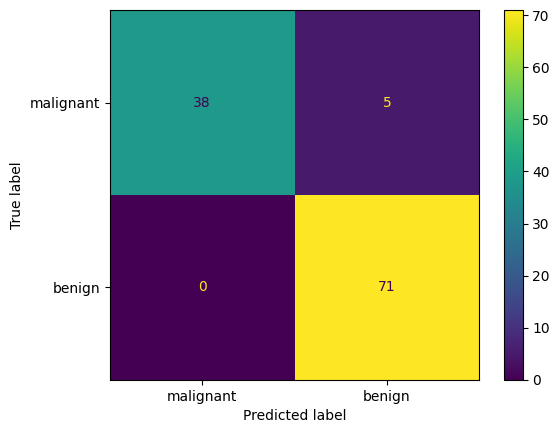

In [ ]:
cm = confusion_matrix(y_test, pred_knn)

# Display Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
disp.plot()

Confusion Matrix:
[[39  4]
 [ 1 70]]


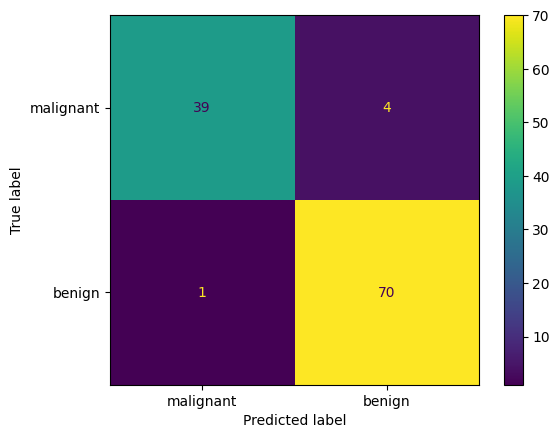

In [ ]:
cm = confusion_matrix(y_test, pred_)

# Display Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Visualize Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
disp.plot()